In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metrics_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19"


training_metrics = pd.read_csv(f"{metrics_path}/metrics.csv")


training_metrics.columns

Index(['brier_score', 'epoch', 'lr_find/suggested_lr', 'multilabel_f1_macro',
       'multilabel_f1_micro', 'multilabel_f1_weighted', 'step',
       'train_brier_Atelectasis_epoch', 'train_brier_Atelectasis_step',
       'train_brier_Cardiomegaly_epoch', 'train_brier_Cardiomegaly_step',
       'train_brier_Consolidation_epoch', 'train_brier_Consolidation_step',
       'train_brier_Edema_epoch', 'train_brier_Edema_step',
       'train_brier_Effusion_epoch', 'train_brier_Effusion_step',
       'train_brier_Emphysema_epoch', 'train_brier_Emphysema_step',
       'train_brier_Fibrosis_epoch', 'train_brier_Fibrosis_step',
       'train_brier_Hernia_epoch', 'train_brier_Hernia_step',
       'train_brier_Infiltration_epoch', 'train_brier_Infiltration_step',
       'train_brier_Mass_epoch', 'train_brier_Mass_step',
       'train_brier_No Finding_epoch', 'train_brier_No Finding_step',
       'train_brier_Nodule_epoch', 'train_brier_Nodule_step',
       'train_brier_Pleural_Thickening_epoch',
   

In [3]:
training_metrics

,brier_score,epoch,lr_find/suggested_lr,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_brier_Atelectasis_epoch,train_brier_Atelectasis_step,train_brier_Cardiomegaly_epoch,...,val_brier_Mass,val_brier_No Finding,val_brier_Nodule,val_brier_Pleural_Thickening,val_brier_Pneumonia,val_brier_Pneumothorax,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,NaN,NaN,0.000001,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,49,NaN,0.322720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,99,NaN,0.302875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,149,NaN,0.291171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,NaN,199,NaN,0.283258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,NaN,49.0,NaN,NaN,NaN,NaN,26949,NaN,0.209614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,49.0,NaN,NaN,NaN,NaN,26999,NaN,0.209596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,49.0,NaN,NaN,NaN,NaN,27049,NaN,0.209579,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,0.191086,49.0,NaN,NaN,NaN,NaN,27049,NaN,NaN,NaN,...,0.208251,0.215283,0.229754,0.20692,0.209237,0.186649,1.096289,0.185317,0.26842,0.465356


In [4]:
columns_to_keep = ['train_loss', 'val_loss', 'epoch']

# Drop all columns except the ones you want to keep
train_val_metrics = training_metrics.drop(columns=training_metrics.columns.difference(columns_to_keep), axis=1)

train_val_metrics_grouped = train_val_metrics.groupby("epoch").mean()

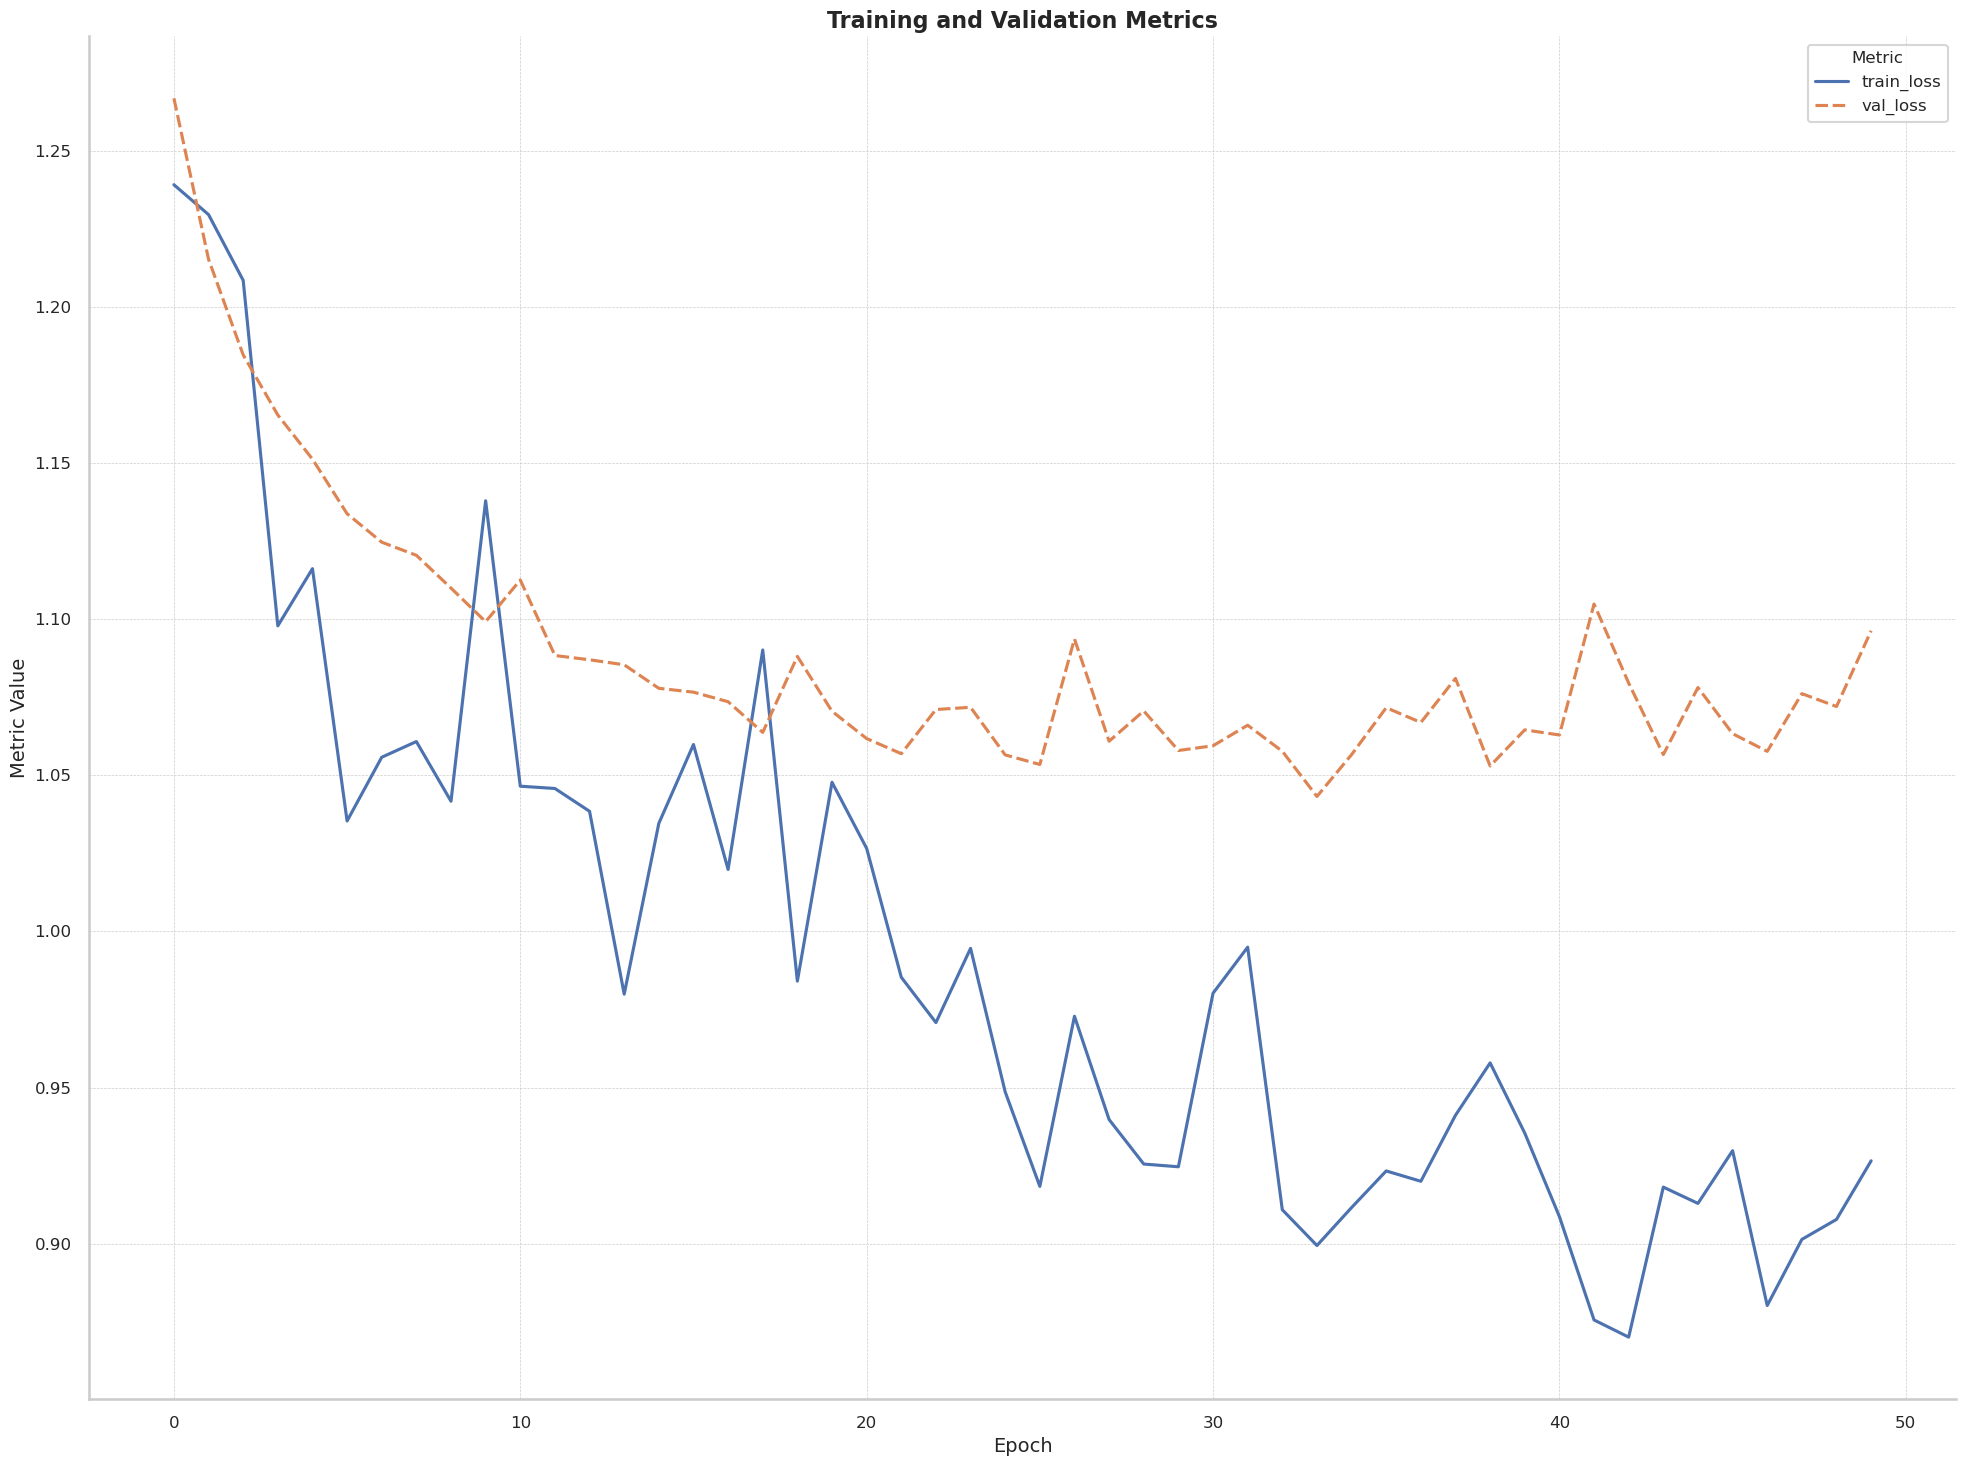

In [5]:
sns.set(style="whitegrid", context="talk")  # "talk" or "paper" for academic feel

plt.figure(figsize=(20, 15))  # More standard academic size

# Plot the data
sns.lineplot(data=train_val_metrics_grouped)

# Title and labels
plt.title("Training and Validation Metrics", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)

# Remove top and right spines
sns.despine()

# Ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optional: Legend
plt.legend(title="Metric", title_fontsize=12, fontsize=12, loc='best')

plt.tight_layout()
plt.savefig("training_and_validation_metrics.png")
plt.show()


In [6]:
auc = pd.read_csv("/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19/auc_per_label.csv")

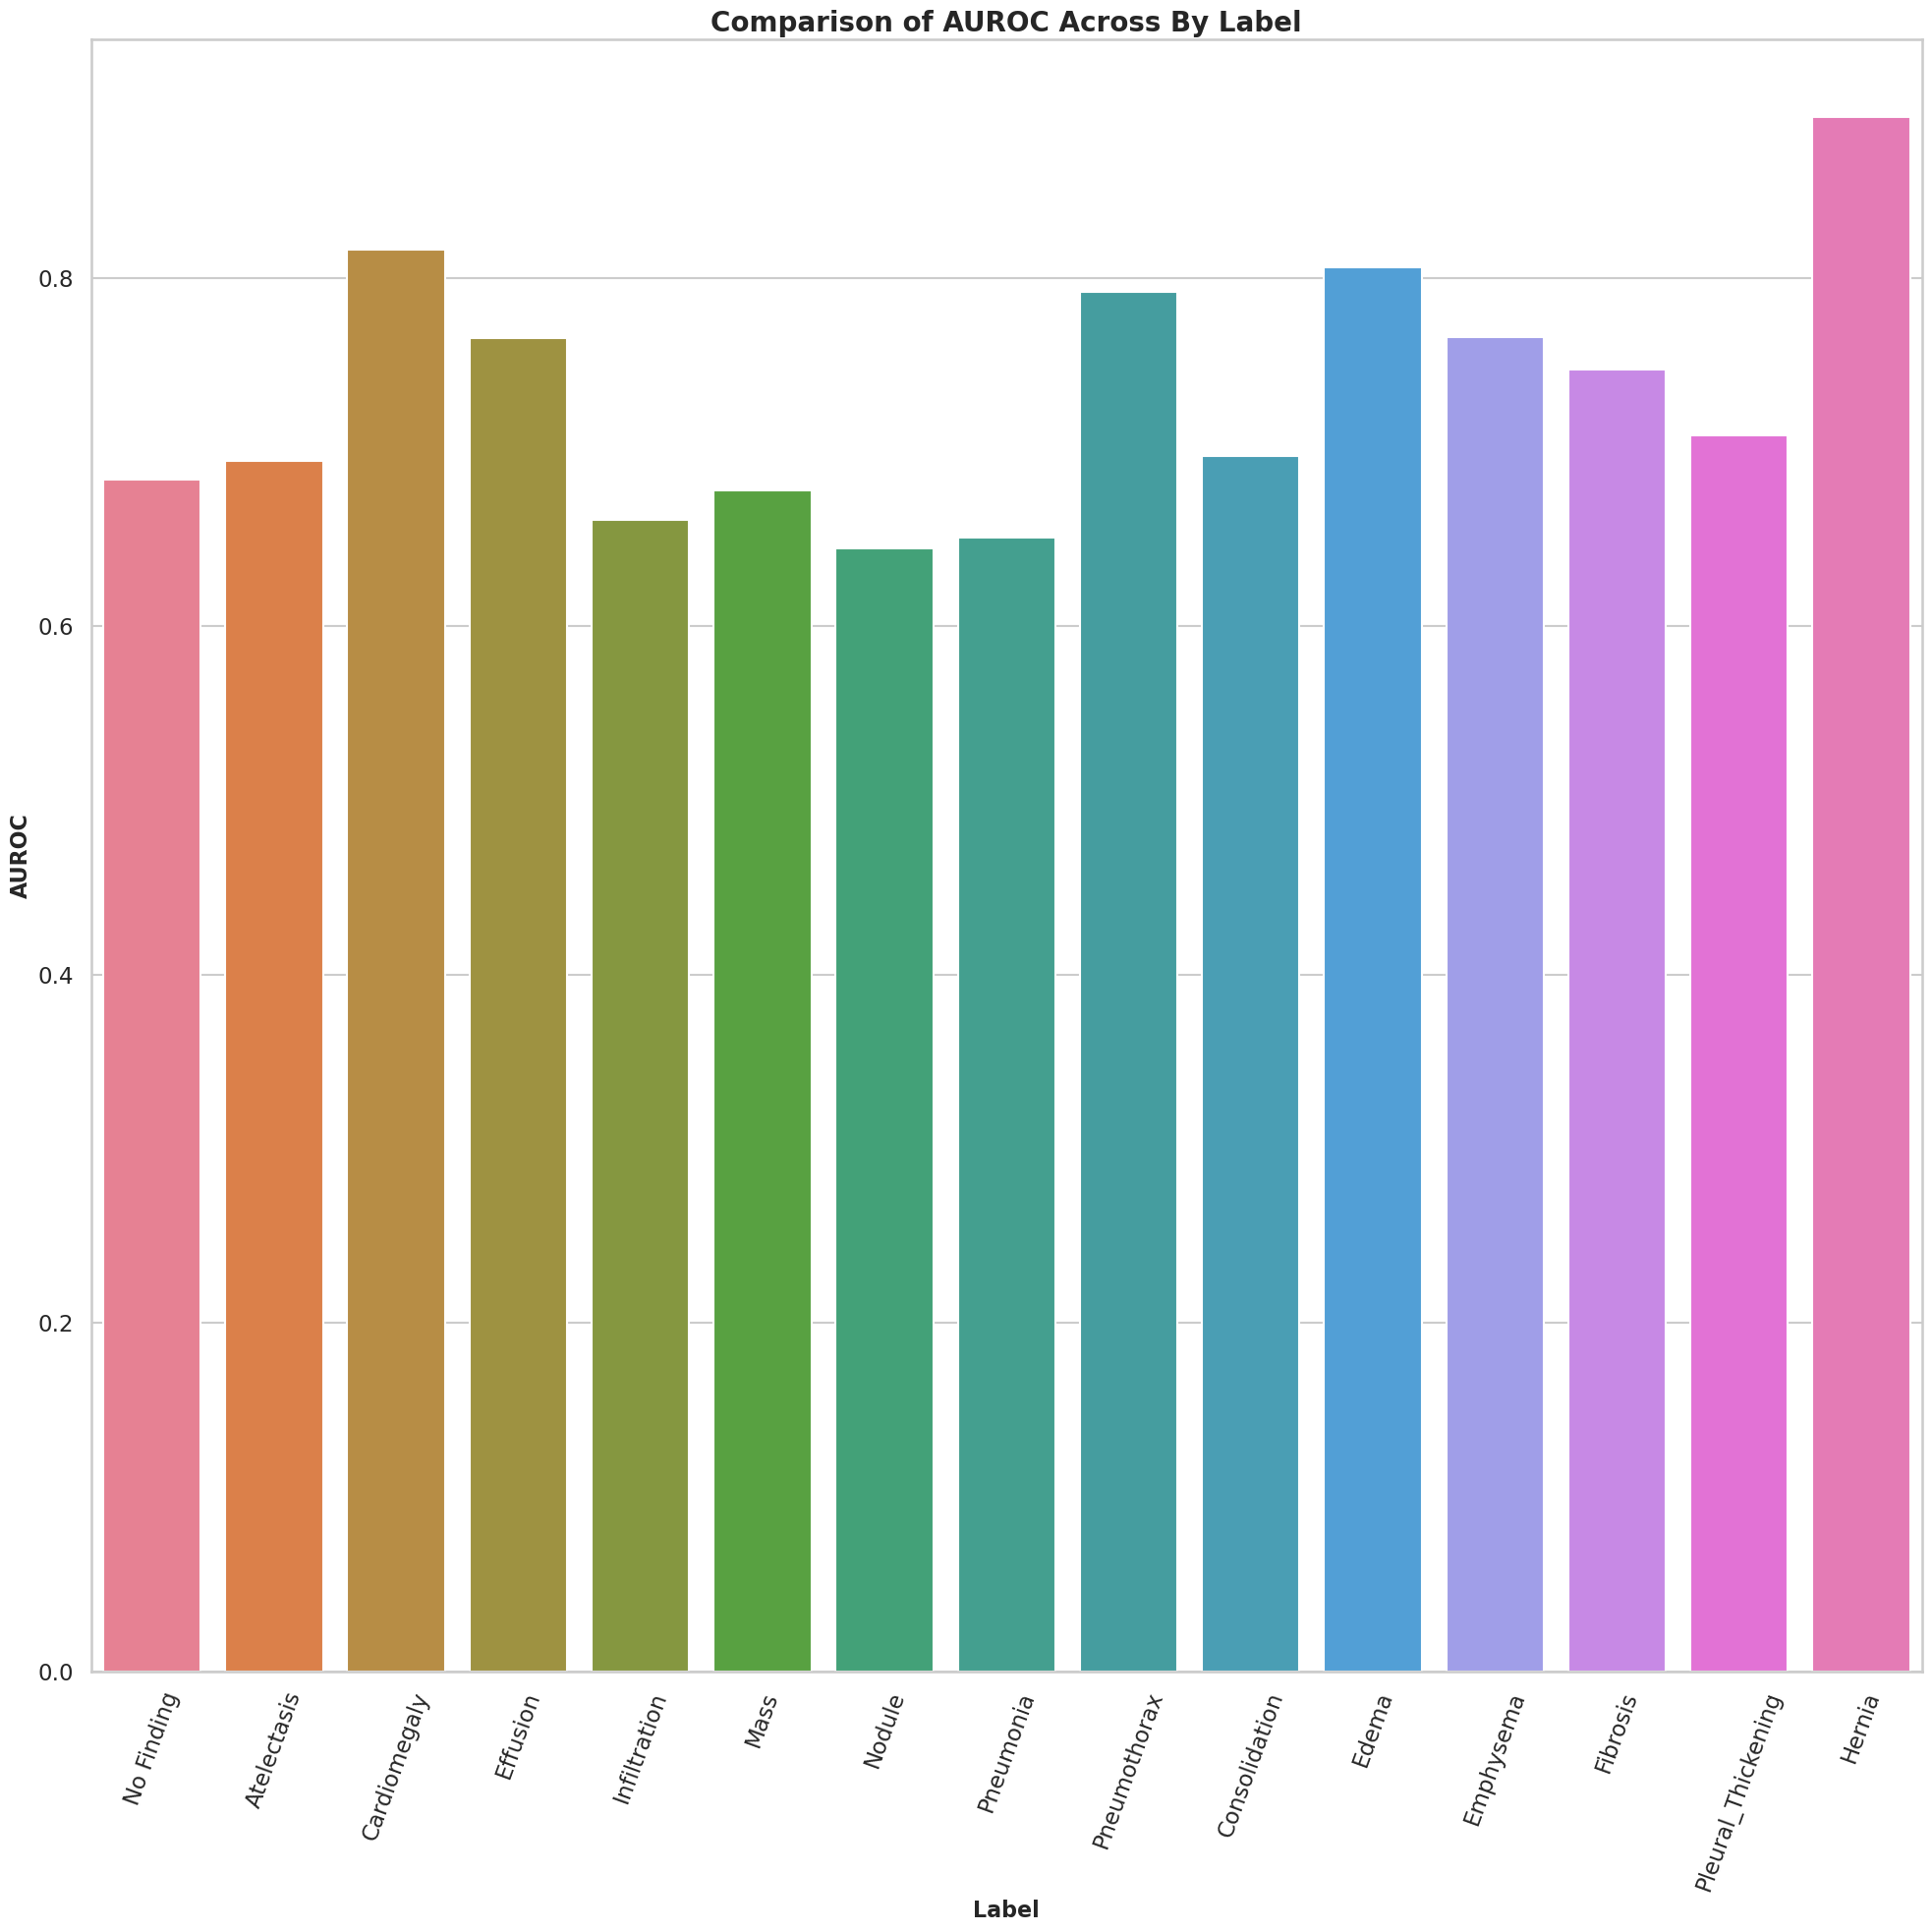

In [7]:
plt.figure(figsize = (20, 20))
sns.barplot(x='label', y='auc_roc', data=auc, hue='label', legend = False)
plt.xlabel("Label", fontsize=16, weight = "bold")
plt.ylabel("AUROC", fontsize=16, weight = "bold")
plt.title("Comparison of AUROC Across By Label", fontsize=20, weight = "bold")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("aucroc_by_label.png")


In [8]:
version_19_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19"

all_pred_probs = pd.read_csv(f"{version_19_path}/all_pred_probs.csv")



all_true_labels = pd.read_csv(f"{version_19_path}/all_true_labels.csv", index_col = 0)

calibrated_probs = pd.read_csv(f"{version_19_path}/all_pred_probs_calibrated.csv")

In [12]:
all_true_labels.columns = all_pred_probs.columns
all_true_labels

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
for idx, label in enumerate(column_names): 
    print(idx, label)

0 No Finding
1 Atelectasis
2 Cardiomegaly
3 Effusion
4 Infiltration
5 Mass
6 Nodule
7 Pneumonia
8 Pneumothorax
9 Consolidation
10 Edema
11 Emphysema
12 Fibrosis
13 Pleural_Thickening
14 Hernia


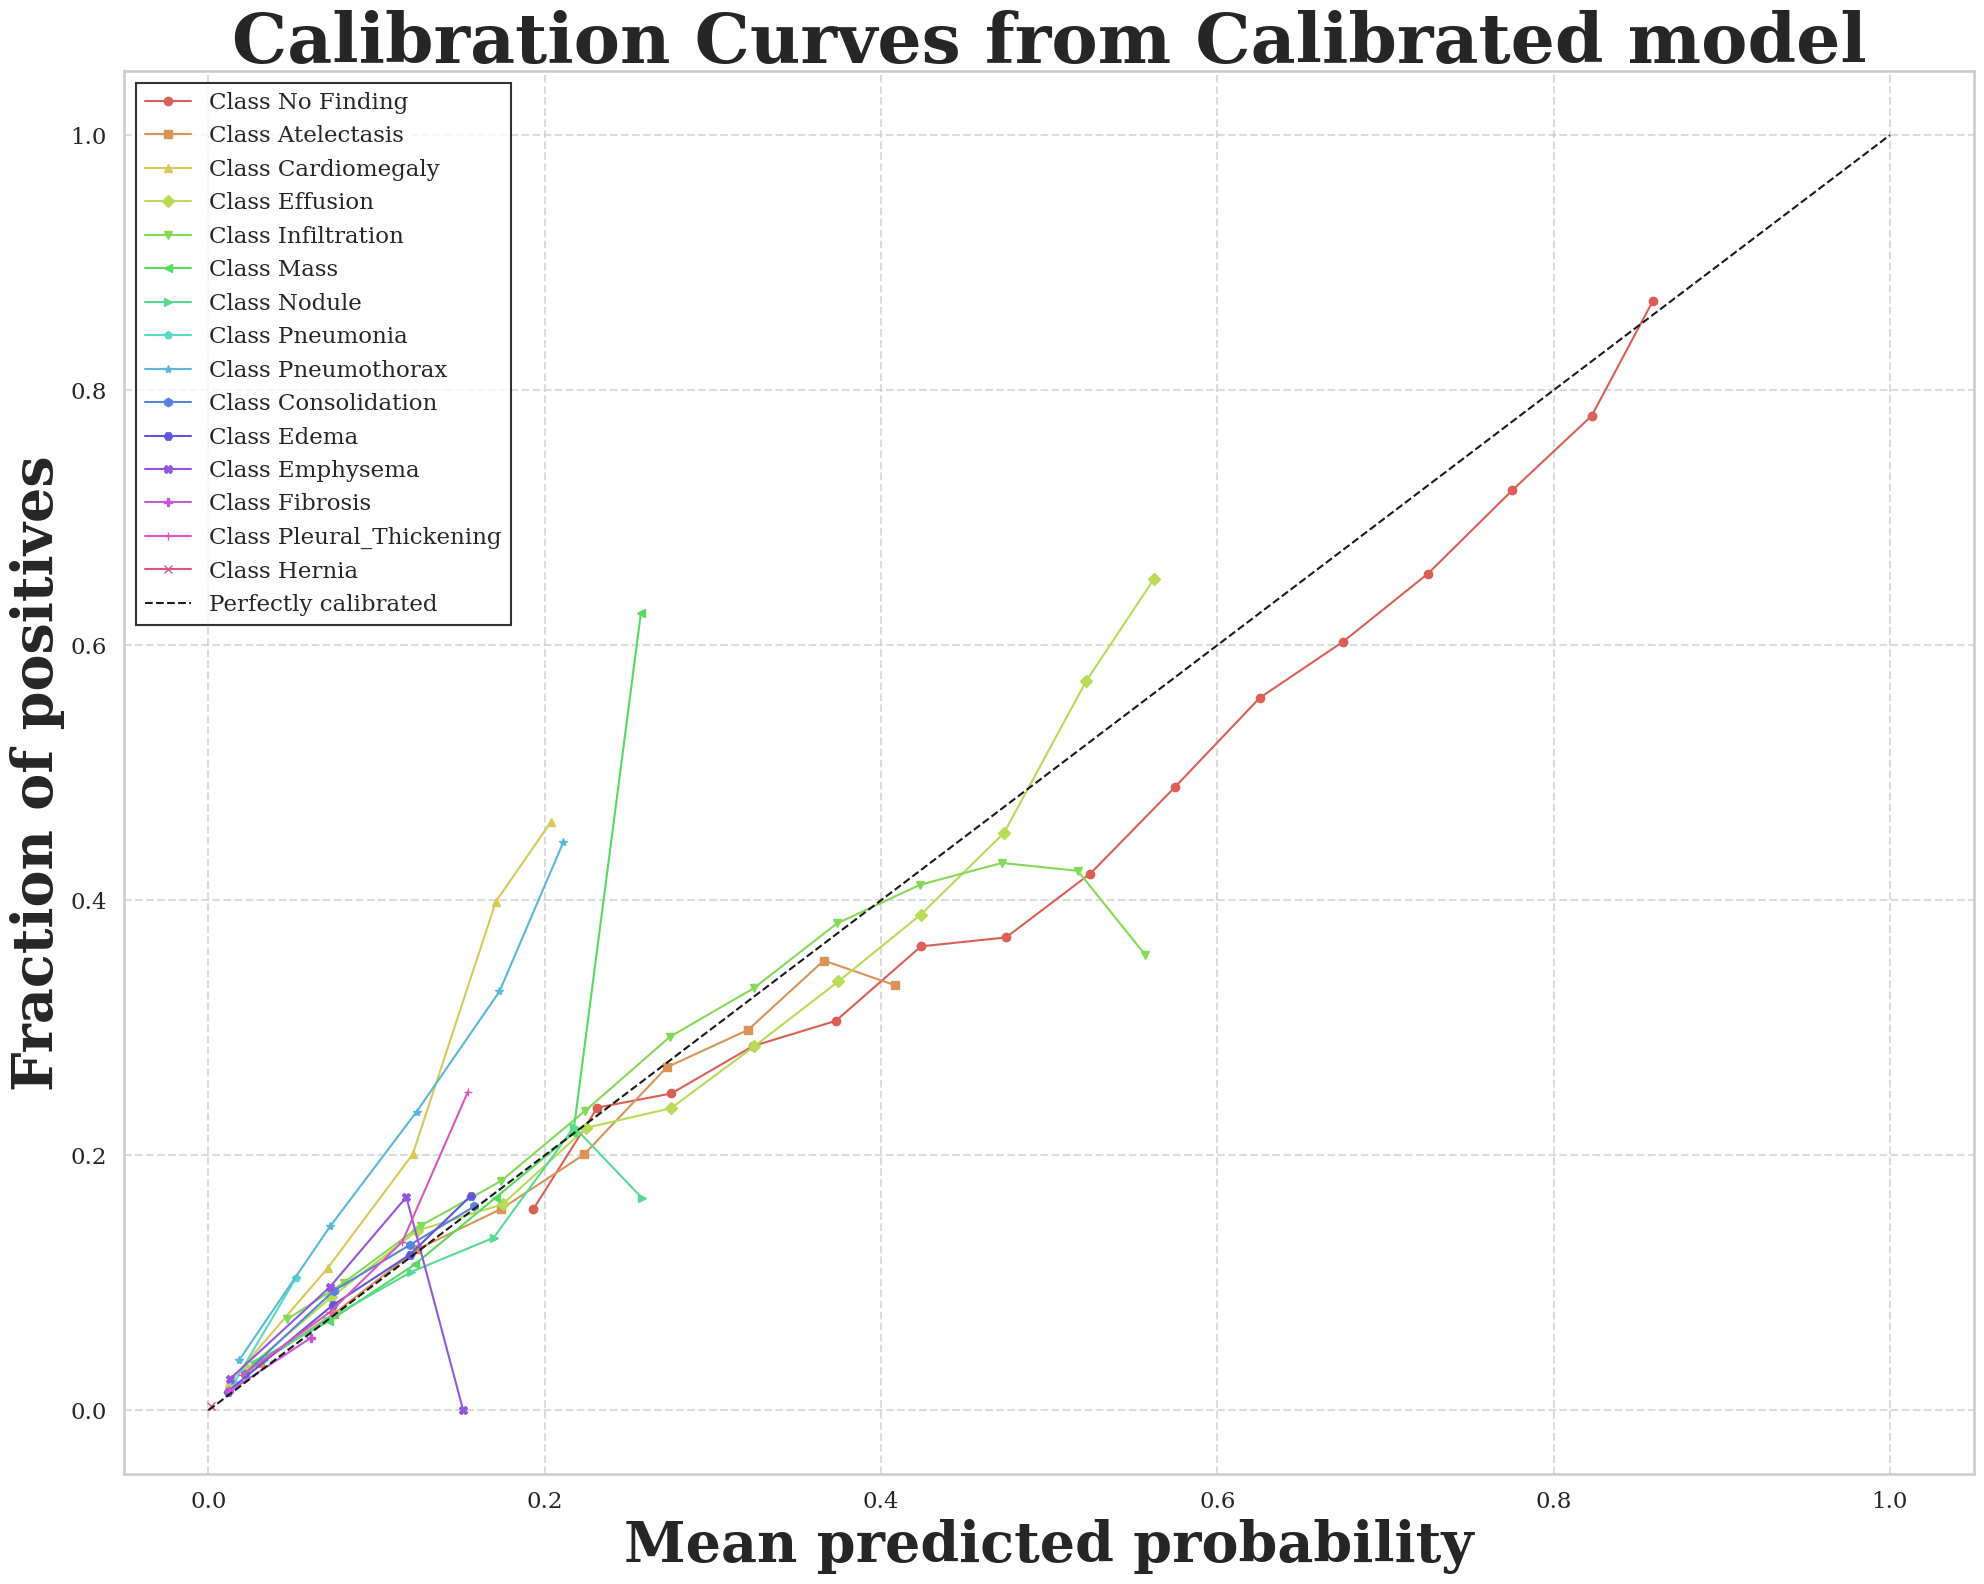

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from matplotlib import rcParams

column_names = calibrated_probs.columns
colors = sns.color_palette("hls", 15)
# Calibrated data ----------------------
# Set academic styling
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

plt.figure(figsize=(20, 16))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', '+', 'x']


for idx, label in enumerate(column_names):
    y_true = np.array(all_true_labels[str(label)])
    y_pred = np.array(calibrated_probs[str(label)])
    
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=20, pos_label=1)
    plt.plot(prob_pred, prob_true, '-', color=colors[idx], marker=markers[idx], 
             markersize=6, lw=1.5, label=f'Class {label}')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Perfectly calibrated')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean predicted probability', fontweight='bold', fontsize = 40)
plt.ylabel('Fraction of positives', fontweight='bold', fontsize = 40)
plt.title('Calibration Curves from Calibrated model', fontweight='bold', fontsize= 50)
plt.legend(frameon=True, fancybox=False, edgecolor='black')
plt.tight_layout()
plt.savefig("calibration_curves_calibrated.png")
plt.show()

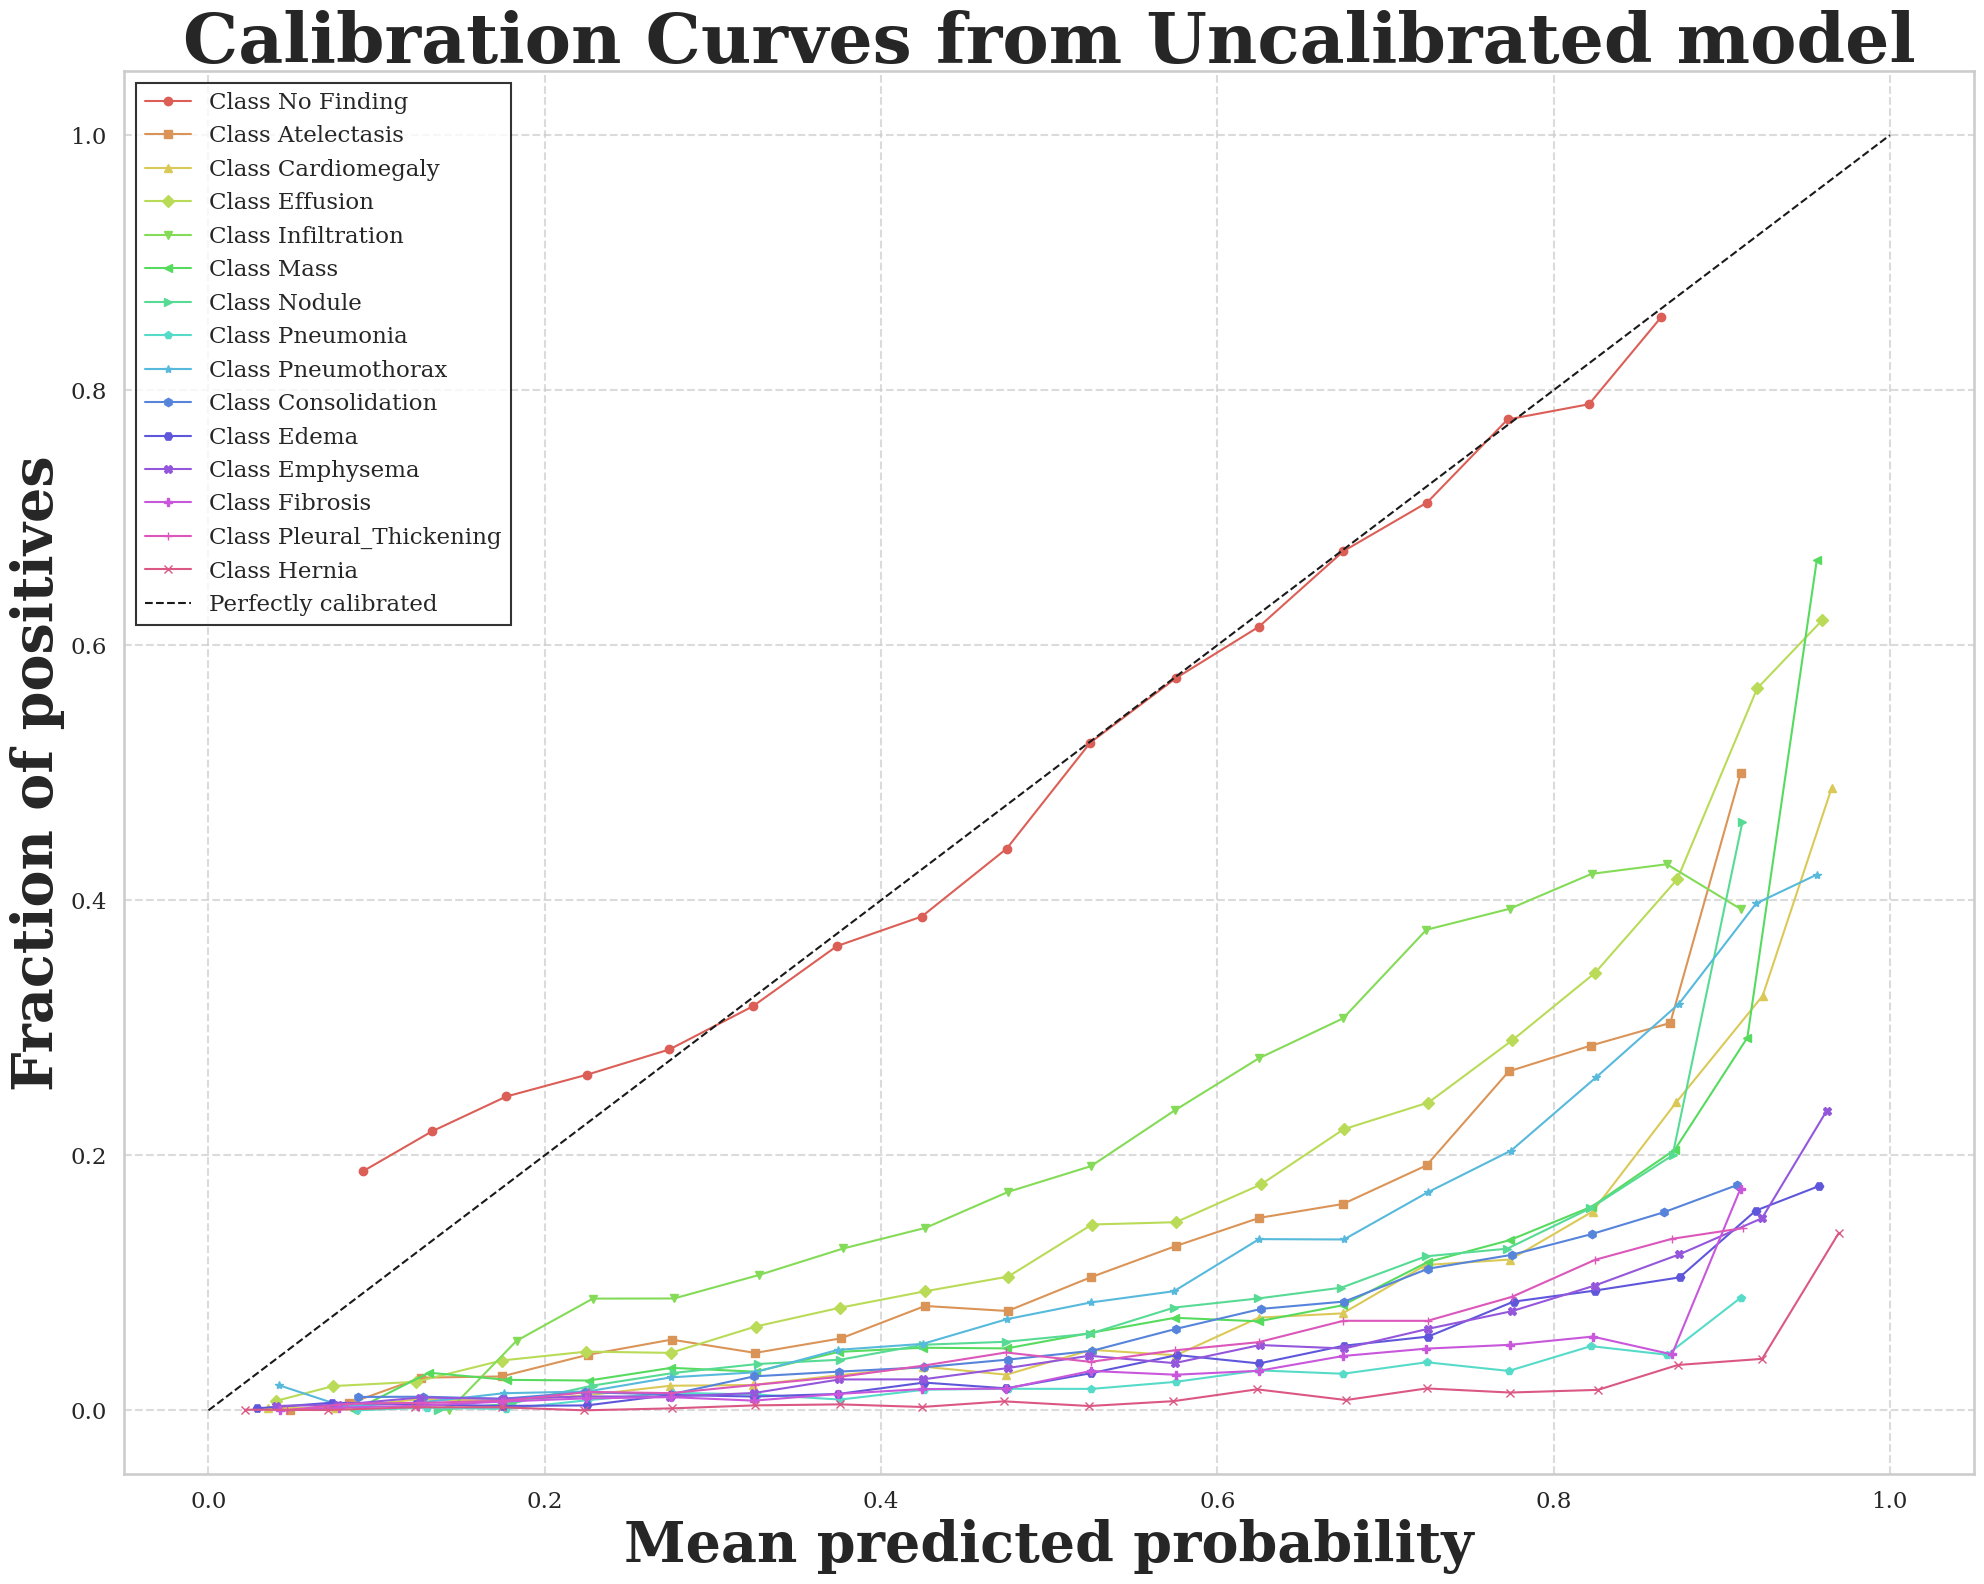

In [36]:
# Calibrated data ----------------------
# Set academic styling
column_names = calibrated_probs.columns
# Calibrated data ----------------------
# Set academic styling
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

plt.figure(figsize=(20, 16))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', '+', 'x']


for idx, label in enumerate(column_names):
    y_true = np.array(all_true_labels[str(label)])
    y_pred = np.array(all_pred_probs[str(label)])
    
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=20, pos_label=1)
    plt.plot(prob_pred, prob_true, '-', color=colors[idx], marker=markers[idx], 
             markersize=6, lw=1.5, label=f'Class {label}')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Perfectly calibrated')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean predicted probability', fontweight='bold', fontsize = 40)
plt.ylabel('Fraction of positives', fontweight='bold', fontsize = 40)
plt.title('Calibration Curves from Uncalibrated model', fontweight='bold', fontsize= 50)
plt.legend(frameon=True, fancybox=False, edgecolor='black')
plt.tight_layout()
plt.savefig("calibration_curves_uncalibrated.png")
plt.show()

In [11]:
label = 0
y_true = np.array(all_true_labels[str(label)])
y_pred = np.array(all_pred_probs[str(label)])
y_pred

array([0.4587908 , 0.3900351 , 0.3599661 , ..., 0.75591296, 0.7301901 ,
       0.8061373 ])

In [12]:
# attempting to calibrate 

# simple case of fitting a logistic model with y_pred as input and y_true as output 

# this should be fitted on our validation probabilities/validation labels!!!
# need to include this in our validation set, for model calibration, then this enables better than above. 
from sklearn.linear_model import LogisticRegression 
label = 0
y_true = np.array(all_true_labels[str(label)])
y_pred = np.array(all_pred_probs[str(label)])

clf = LogisticRegression().fit(X=y_pred.reshape(-1, 1), y=y_true)


In [15]:
clf.predict_proba(X = y_pred.reshape(-1, 1))

array([[0.54246483, 0.45753517],
       [0.60729218, 0.39270782],
       [0.63463008, 0.36536992],
       ...,
       [0.27332416, 0.72667584],
       [0.29350366, 0.70649634],
       [0.23651338, 0.76348662]])